# ML Environment Setup Verification

This notebook is designed to verify that our ML workspace is correctly set up with the `ml-env` conda environment as the default Python interpreter.

## 1. Check Current Python Interpreter

Let's verify which Python interpreter is currently being used.

In [1]:
import sys
import platform
import os

print(f"Python version: {platform.python_version()}")
print(f"Python executable path: {sys.executable}")
print(f"Conda environment: {os.environ.get('CONDA_DEFAULT_ENV', 'Not in a conda environment')}")
print(f"Conda prefix: {os.environ.get('CONDA_PREFIX', 'No conda prefix found')}")

Python version: 3.12.11
Python executable path: /opt/anaconda3/envs/ml-env/bin/python
Conda environment: ml-env
Conda prefix: /opt/anaconda3/envs/ml-env


## 2. Verify Required Libraries

Let's check if all the required libraries for data science and machine learning are properly installed in our environment.

In [2]:
def check_library(library_name):
    try:
        lib = __import__(library_name)
        version = getattr(lib, '__version__', 'unknown version')
        print(f"✅ {library_name}: {version}")
        return True
    except ImportError:
        print(f"❌ {library_name}: Not installed")
        return False

# Check core libraries for data science and machine learning
libraries = ['numpy', 'pandas', 'matplotlib', 'seaborn', 'sklearn', 'tensorflow']

all_installed = True
for lib in libraries:
    if not check_library(lib):
        all_installed = False

if all_installed:
    print("\nAll required libraries are installed! 🎉")
else:
    print("\nSome libraries are missing. Please install them to use all features.")

✅ numpy: 2.0.2
✅ pandas: 2.2.3
✅ pandas: 2.2.3
✅ matplotlib: 3.10.0
✅ matplotlib: 3.10.0
✅ seaborn: 0.13.2
✅ sklearn: 1.6.1
✅ seaborn: 0.13.2
✅ sklearn: 1.6.1


2025-06-19 19:05:43.641592: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


✅ tensorflow: 2.18.1

All required libraries are installed! 🎉


## 3. Simple Visualization Test

Let's create a simple matplotlib visualization to verify that the graphical libraries work correctly.

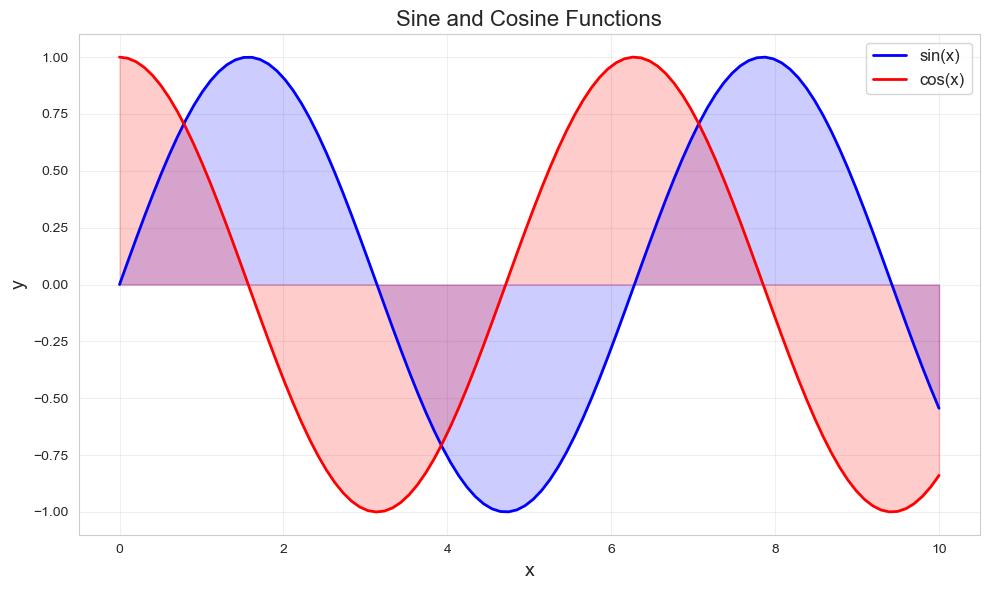

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style("whitegrid")

# Create some sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create a simple plot
plt.figure(figsize=(10, 6))

plt.plot(x, y1, label='sin(x)', linewidth=2, color='blue')
plt.plot(x, y2, label='cos(x)', linewidth=2, color='red')

plt.fill_between(x, y1, alpha=0.2, color='blue')
plt.fill_between(x, y2, alpha=0.2, color='red')

plt.title('Sine and Cosine Functions', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Simple Machine Learning Example

Let's verify that scikit-learn works correctly by creating a simple example.

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.4f}\n")

# Display classification report
target_names = iris.target_names
report = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n")
print(report)

# Show feature importance
feature_importances = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:\n")
print(feature_importances)

Model accuracy: 1.0000

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Feature Importance:

             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


## 5. Conclusion

This notebook verified that:

1. The `ml-env` conda environment is correctly configured as the default Python interpreter
2. All required libraries are installed and functional
3. Data visualization with matplotlib and seaborn works correctly
4. Machine learning functionality with scikit-learn works correctly

If all cells ran successfully, your ML environment is properly set up and ready for data science and machine learning tasks!